In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


## Reading data from the CSV file

In [3]:
data=pd.read_csv("D:/W.O.R.K/Python/googleplaystore_dataset/googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.columns = data.columns.str.replace(' ', '_')

In [5]:
print("shape of Data: ",data.shape)
print("data types: \n", data.dtypes.value_counts())

shape of Data:  (10841, 13)
data types: 
 object     12
float64     1
dtype: int64


## SIZE


In [6]:
data.Size.value_counts().head()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: Size, dtype: int64

In [8]:
#replacing k and M with their values to convert values to numeric.
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

Now, we have some two types of values in our Size data.

exponential values (not yet converted to string)
Strings (that cannot be converted into numeric)
Thus specifing categories 1 and 2 as an boolean array temp, to convert category 1 to numeric.

In [9]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=data.Size.apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

Now checking unique non numeric values(~temp) in Size.

In [12]:
data.Size[~temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

Replacing 'Varies with Device' by nan and
converting 1,000+ to 1000, to make it numeric

In [13]:
data.Size=data.Size.replace('Varies with device', np.nan)
data.Size=data.Size.replace('1,000+', 1000)

Converting the cleaned Size data to numeric type

In [14]:
data.Size=pd.to_numeric(data.Size)

## INSTALLS

Checking unique values in install data 

In [16]:
data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

It can be seen that there are 22 unique values, out of which 

1 is 0


1 is Free(string), which we will be converting to nan here

And rest are numeric but with '+' and ','which shall be removed to convert these into numeric type.

In [18]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.replace('Free',np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

Checking if data is converted to numeric

In [19]:
data.Installs.str.isnumeric().sum()

10840

Now in Installs only 1 sample is non numeric out of 10841, which is nan ("Free")

In [20]:
data.Installs=pd.to_numeric(data.Installs)

## REVIEWS

Checking if all values in number of Reviews numeric

In [21]:
data.Reviews.str.isnumeric().sum()

10840

One review is non numeric out of 10841.

In [22]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The entries in this row are enrterd wrong way. So let's delete this row for now .

In [23]:
data=data.drop(data.index[10472])

Let's check if the row is deleted

In [25]:
data[10472: ].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100000.0,10000000.0,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14000000.0,1000.0,Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [26]:
data.Reviews=data.Reviews.replace(data.Reviews[~data.Reviews.str.isnumeric()],np.nan)

## RATING

For entries to be right we need to make sure they fall within the range 1 to 5 

In [27]:
print("Range:", data.Rating.min(),"-", data.Rating.max())

Range: 1.0 - 5.0


Checking the type of data, to see if it needs to be converted to numeric

In [28]:
data.Rating.dtype

dtype('float64')

Data is already in numeric value now let's check for any null values

In [29]:
print(data.Rating.isna().sum(), "null values out of ",len(data.Rating))

1474 null values out of  10840


## TYPE

Checking for unique type values and any problem with the data

In [30]:
data.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

There are only two types, free and paid. No unwanted data here.

## Price

Checking for unique values of price, along with any abnormalities

In [32]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Data had $ sign which shall be removed to convert it to numeric

In [34]:
data.Price=data.Price.apply(lambda x: x.strip('$'))

In [35]:
data.Price=pd.to_numeric(data.Price)


## CATEGORY

Now let's inspect the category by looking into the unique terms

In [36]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

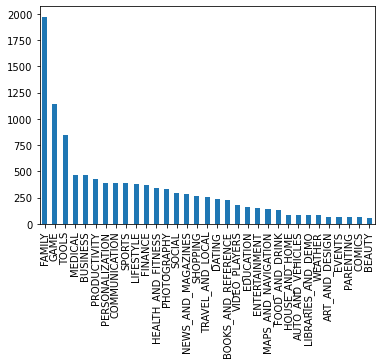

In [37]:
data.Category.value_counts().plot(kind='bar')

## CONTENT RATING

Checking unique terms in Content Rating Categories, and for repetitve or abnormal data

In [38]:
data.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

No abnormalies or repetiton found

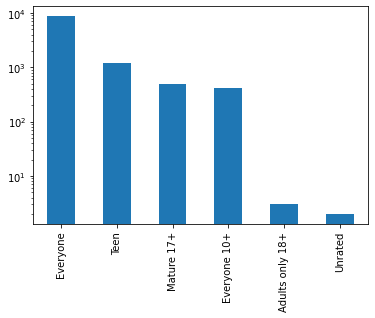

In [40]:
data.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

## GENRES

Checking for unique values, abnormalitity or repetition in data

In [41]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

The data is in the format Category;Subcategory. Let's divide the data into two columns, one as primary category and the other as secondary,  using ; as separator

In [42]:
sep=';'
rest = data.Genres.apply(lambda x: x.split(sep)[0])
data['Pri_Genres']=rest
data.Pri_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

In [45]:
rest = data.Genres.apply(lambda x: x.split(sep)[-1])
rest.unique()
data['Sec_Genres']=rest
data.Sec_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [47]:
grouped = data.groupby(['Pri_Genres','Sec_Genres'])
grouped.size().head(15)

Pri_Genres       Sec_Genres        
Action           Action                365
                 Action & Adventure     17
Adventure        Action & Adventure     13
                 Adventure              75
                 Brain Games             1
                 Education               2
Arcade           Action & Adventure     16
                 Arcade                220
                 Pretend Play            1
Art & Design     Action & Adventure      2
                 Art & Design           58
                 Creativity              7
                 Pretend Play            2
Auto & Vehicles  Auto & Vehicles        85
Beauty           Beauty                 53
dtype: int64

Generating a two table to better understand the relationship between primary and secondary categories of Genres

In [48]:
twowaytable = pd.crosstab(index=data["Pri_Genres"], columns=data["Sec_Genres"])
twowaytable.head()

Sec_Genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Pri_Genres,,,,,,,,,,,,,,,,,,,,,
Action,365,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,75,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,16,0,220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art & Design,0,2,0,0,58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## LAST UPDATED

Checking the format of data in Last Updated Dates

In [49]:
data.Last_Updated.head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

Converting the data i.e. string to datetime format for further processing

In [50]:
from datetime import datetime,date
temp=pd.to_datetime(data.Last_Updated)
temp.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]

Taking a difference between last updated date and today tio simplify the data for future processing. It gives days.

In [51]:
data['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
data.Last_Updated_Days.head()

0   1227 days
1   1219 days
2   1021 days
3   1075 days
4   1063 days
Name: Last_Updated_Days, dtype: timedelta64[ns]

## ANDROID VERSION

Checking unique values, repetition, or any abnormalities.

In [52]:
data.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Most of the values have a upper value and a lower value (i.e. a range), lets divide them as two new features Version begin and end, which might come handy while procesing data further.

In [55]:
data['Version_begin']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[0].split('-')[0])
data.Version_begin=data.Version_begin.replace('4.4W','4.4')
data['Version_end']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [56]:
data.Version_begin.unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '4.0.3 ', '2.0', '3.2', '7.1', '7.0 ', '8.0',
       '5.0 ', '3.1', '2.0.1', '4.1 ', 'nan', '1.0', '2.2 '], dtype=object)

Representing categorial data as two way table and plotting it as stacked columns for better understanding

In [57]:
twowaytable = pd.crosstab(index=data.Version_begin, columns=data.Version_end)
twowaytable.head()

Version_end,6.0,7.1.1,8.0,Varies with device,nan,up
Version_begin,,,,,,
1.0,0,0,0,0,0,2
1.5,0,0,0,0,0,20
1.6,0,0,0,0,0,116
2.0,0,0,0,0,0,32
2.0.1,0,0,0,0,0,7


In [58]:
data.Version_end.unique()

array(['up', 'Varies with device', '7.1.1', '8.0', 'nan', '6.0'],
      dtype=object)

## CURRENT VERSION

In [59]:
data.Current_Ver.value_counts().head(6)

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
Name: Current_Ver, dtype: int64

Lets convert all the version in the format number.number to simplify the data, and check if the data has null values. Also, we are not considering converting value_counts to nan here due to its high frequency.

In [60]:
data.Current_Ver.isna().sum()

8

As we have only 8 nans lets replace them with Varies with data to simplify

In [62]:
import re
temp=data.Current_Ver.replace(np.nan,'Varies with device')
temp=temp.apply(lambda x: 'Varies with device' if x=='Varies with device' else re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0])

In [64]:
temp.unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '8.0', '3.3',
       '9.1', '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2',
       '3.5', '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3',
       '6.3', '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '', '6', '7.5',
       '9.9', '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1',
       '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '0',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'],
      dtype=object)

Saving the updated current version values as a new column

In [65]:
data['Current_Ver_updated']=temp

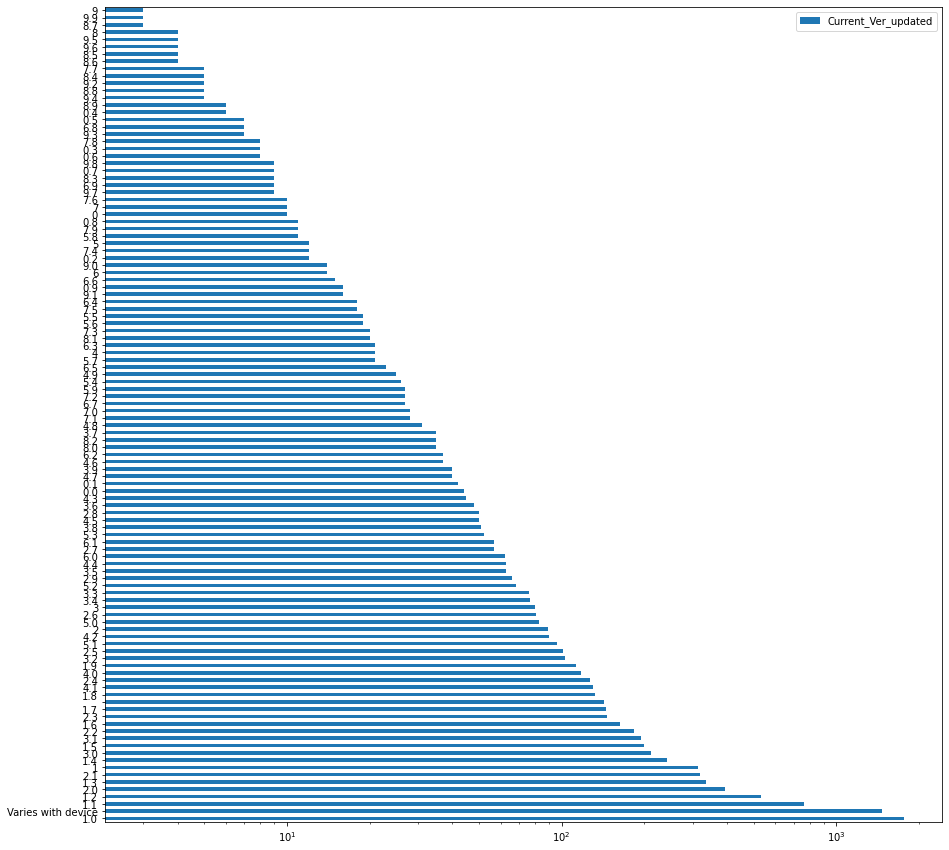

In [67]:
data.Current_Ver_updated.value_counts().plot(kind="barh", figsize=(15,15));
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

In [68]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Pri_Genres,Sec_Genres,Last_Updated_Days,Version_begin,Version_end,Current_Ver_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,Art & Design,1227 days,4.0.3,up,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play,1219 days,4.0.3,up,2.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,Art & Design,1021 days,4.0.3,up,1.2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,Art & Design,1075 days,4.2,up,Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity,1063 days,4.4,up,1.1


In [69]:
data.to_csv('Updated_googleplaystore_dataset.csv')